# Preface
My occupation is wizard: I wave my magic wand and shit happens. 
> We are about to talk about study the idea of a computational process. Computational processes are abstract beings that inhabit computers. As they evolve, processes manipulate other abstract things called data. The evolution of a process is directed by a pattern of rules called a program. People create programs to direct processes. In effect, we conjure the spirits of the computer with our spells.

One of the factions in Hogwarts pushes the agenda of embracing computational process that emulates human brain and saught to obtain the oracle of solving complex problems which other factions struggled to solve. The protagonist faction in this book calls themselves Connectionists, and this is the story of connectionsm.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import numpy as np

# source file mlp.py
import mlp

## Multi-layer perceptrons

- 3 layer architecture
- feed forward
- backpropagate for gradient descent
- update _once_ every epoch, not during sample loop
- training testing split, testing set untouchable
- mini batch gradient descent for hand-written letter


In [2]:
xor_X,xor_y = mlp.get_Xor_data()

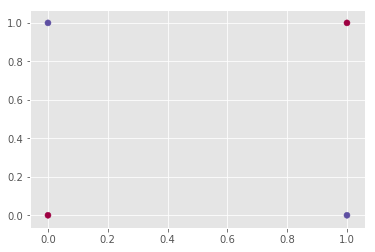

In [3]:
plt.scatter(xor_X[:,0],xor_X[:,1], c=xor_y[:,1], cmap=plt.cm.Spectral)

In [4]:
# 2 hidden unit MLP for XOR demonstration
xor_mlp_2 = mlp.MLP(xor_X, xor_y, 2)

In [5]:
xor_mlp_2.train(print_loss=True)

Data loss (cross entropy) after epoch 0: 0.6861598242933123
Data loss (cross entropy) after epoch 2000: 0.5028045648406304
Data loss (cross entropy) after epoch 4000: 0.4788524896088624
Data loss (cross entropy) after epoch 6000: 0.030596319443061536
Data loss (cross entropy) after epoch 8000: 0.012764644071794779
Data loss (cross entropy) after epoch 10000: 0.007943765071568059
Data loss (cross entropy) after epoch 12000: 0.005736992837964628
Data loss (cross entropy) after epoch 14000: 0.004479064073832158
Data loss (cross entropy) after epoch 16000: 0.003668658218050916
Data loss (cross entropy) after epoch 18000: 0.0031039719089720483
Data loss (cross entropy) after epoch 20000: 0.0026884077996359853
Data loss (cross entropy) after epoch 22000: 0.0023700195106840447
Data loss (cross entropy) after epoch 24000: 0.002118422822539804
Data loss (cross entropy) after epoch 26000: 0.0019146763676030475
Data loss (cross entropy) after epoch 28000: 0.0017463663143026439
Data loss (cross en

In [6]:
def plot_xor_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = xor_X[:, 0].min() - .5, xor_X[:, 0].max() + .5
    y_min, y_max = xor_X[:, 1].min() - .5, xor_X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(xor_X[:,0],xor_X[:,1], c=xor_y[:,1], cmap=plt.cm.Spectral)

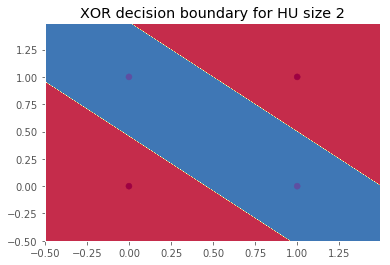

In [7]:
plot_xor_decision_boundary(lambda x: xor_mlp_2.predict(x))
plt.title("XOR decision boundary for HU size {0}".format(2))

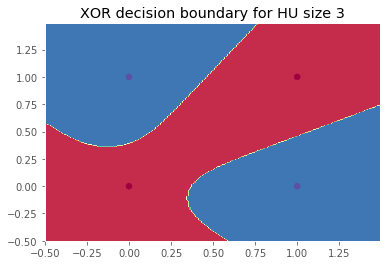

In [8]:
xor_mlp_3 = mlp.MLP(xor_X, xor_y, 3)
xor_mlp_3.train()
plot_xor_decision_boundary(lambda x: xor_mlp_3.predict(x))
plt.title("XOR decision boundary for HU size {0}".format(3))

## Exceptional :)
- 16 attribute
- A-Z as classes
- 20000 samples
- 80% split (recommended)
- 10 hidden units (recommended)

In [9]:
import pandas as pd # only for csv reading, no other usage, i swear :)
dataset = pd.read_csv('letter-recognition.data',delimiter=',',header=None)
print("shape {0}".format(dataset.shape))
dataset.head()

shape (20000, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [10]:
hwl_X, hwl_y= mlp.get_Hwl_data()

In [11]:
training_X, training_y, testing_X, testing_y = mlp.get_data_split(hwl_X, hwl_y, 0.8)

In [12]:
training_X.shape[0]

16000

In [13]:
# recommended 10 hidden units
hwl_mlp_10 = mlp.MLP(training_X, training_y, 10)

In [14]:
# train using mini batch, batch size 16 (2^4 for cache friendliness, my laptop is poor)
hwl_mlp_10.minibatch_train(batch_size=16, testset_X=testing_X, testset_y=testing_y)

Accuracy after epoch 0: 0.051%
Accuracy after epoch 2000: 0.483%
Accuracy after epoch 4000: 0.527%
Accuracy after epoch 6000: 0.53525%
Accuracy after epoch 8000: 0.58675%
Accuracy after epoch 10000: 0.572%
Accuracy after epoch 12000: 0.5805%
Accuracy after epoch 14000: 0.6115%
Accuracy after epoch 16000: 0.59725%
Accuracy after epoch 18000: 0.6305%
Accuracy after epoch 20000: 0.617%
Accuracy after epoch 22000: 0.63775%
Accuracy after epoch 24000: 0.62675%
Accuracy after epoch 26000: 0.594%
Accuracy after epoch 28000: 0.651%
Accuracy after epoch 30000: 0.596%
Accuracy after epoch 32000: 0.6195%
Accuracy after epoch 34000: 0.63575%
Accuracy after epoch 36000: 0.6035%
Accuracy after epoch 38000: 0.65875%
Accuracy after epoch 40000: 0.60675%
Accuracy after epoch 42000: 0.615%
Accuracy after epoch 44000: 0.61725%
Accuracy after epoch 46000: 0.64475%
Accuracy after epoch 48000: 0.64625%
Accuracy after epoch 50000: 0.61475%
Accuracy after epoch 52000: 0.62975%
Accuracy after epoch 54000: 0.60